In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
visa_df=pd.read_csv(r"C:\Users\avina\OneDrive\Documents\NareshIT\DATA SCIENCE & AI\Data files\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


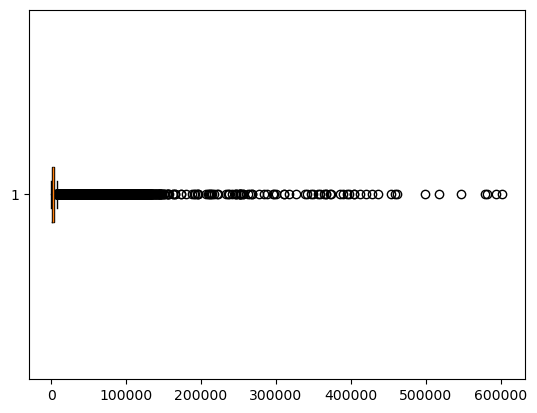

In [14]:
plt.boxplot(visa_df['no_of_employees'],vert=False)
plt.show()

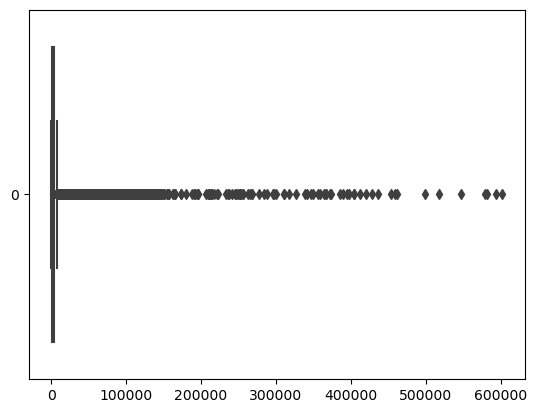

In [15]:
sns.boxplot(visa_df['no_of_employees'],orient='h')
plt.show()

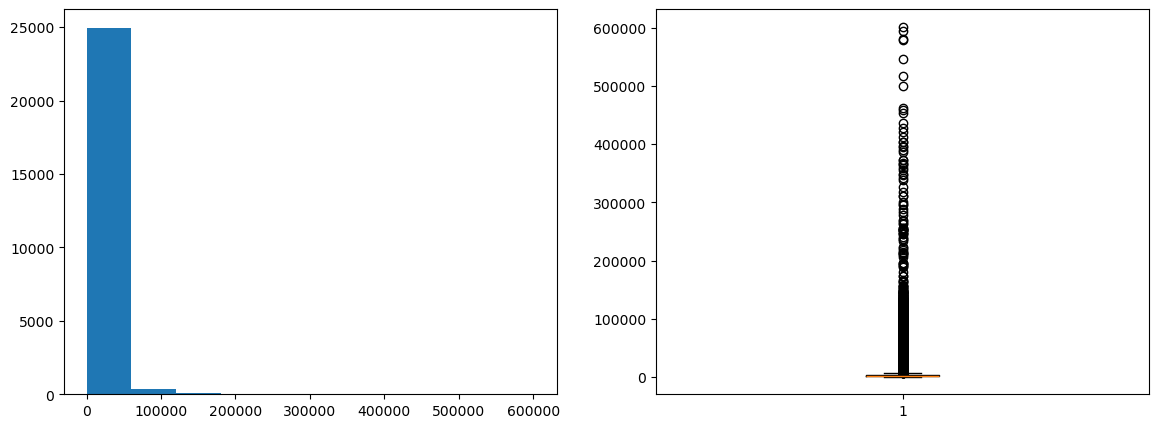

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df['no_of_employees'])
plt.show()

In [18]:
Q1= round(np.percentile(visa_df['no_of_employees'],25),2)
Q1

1022.0

In [20]:
Q3= round(np.percentile(visa_df['no_of_employees'],75),2)
Q3

3504.0

In [21]:
IQR = Q3-Q1
IQR

2482.0

In [22]:
LB=Q1-1.5*IQR
LB

-2701.0

In [23]:
UB=Q3+1.5*IQR
UB

7227.0

**outliers data**

In [34]:
cond1=visa_df['no_of_employees']<LB
cond2=visa_df['no_of_employees']>UB
outliers_data=visa_df[cond1|cond2]
len(outliers_data)

1556

**non_outliers data**

In [35]:
cond1=visa_df['no_of_employees']>LB
cond2=visa_df['no_of_employees']<UB
non_outliers_data=visa_df[cond1&cond2]
len(non_outliers_data)

23924

**Histogram and boxplot for nonoutliers data**

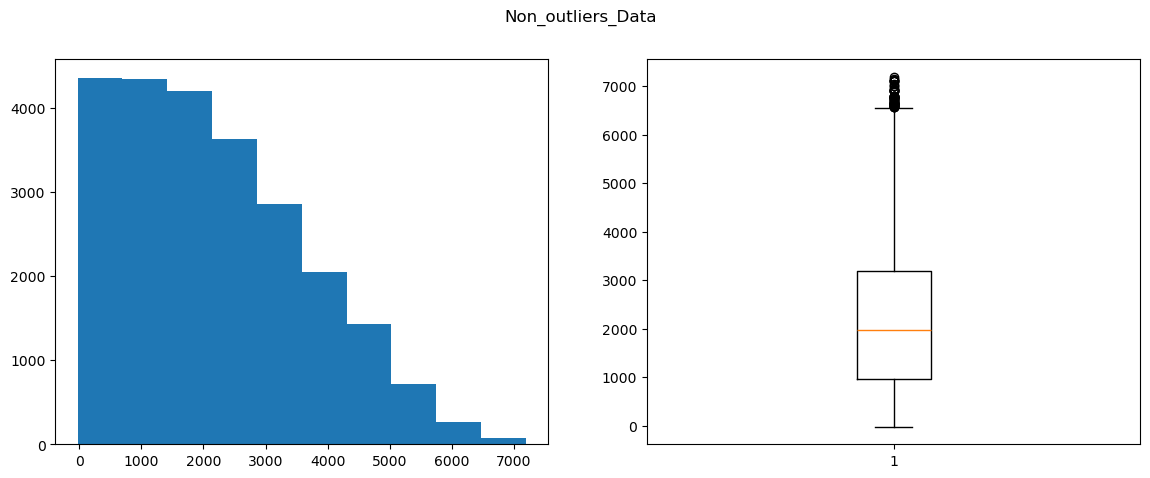

In [37]:
plt.figure(figsize=(14,5))
plt.suptitle('Non_outliers_Data')
plt.subplot(1,2,1).hist(non_outliers_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outliers_data['no_of_employees'])
plt.show()

**None_0utliers_Data with original data**

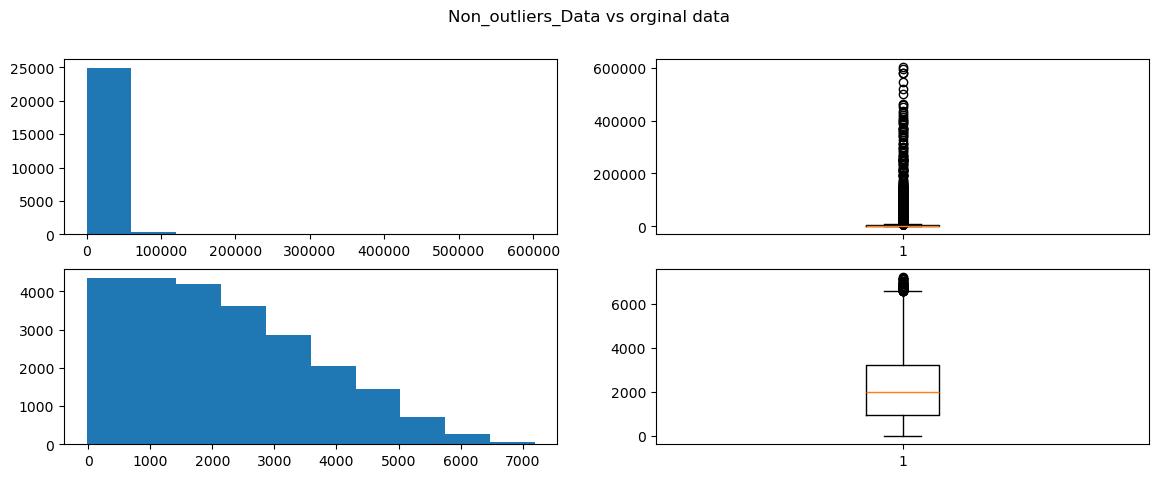

In [39]:
plt.figure(figsize=(14,5))
plt.suptitle("Non_outliers_Data vs orginal data")
plt.subplot(2,2,3).hist(non_outliers_data['no_of_employees'])  #25053  
plt.subplot(2,2,4).boxplot(non_outliers_data['no_of_employees']) #25053
plt.subplot(2,2,1).hist(visa_df['no_of_employees'])  #25480
plt.subplot(2,2,2).boxplot(visa_df['no_of_employees']) #25480
plt.show()

In [40]:
median = visa_df['no_of_employees'].median()
median

2109.0

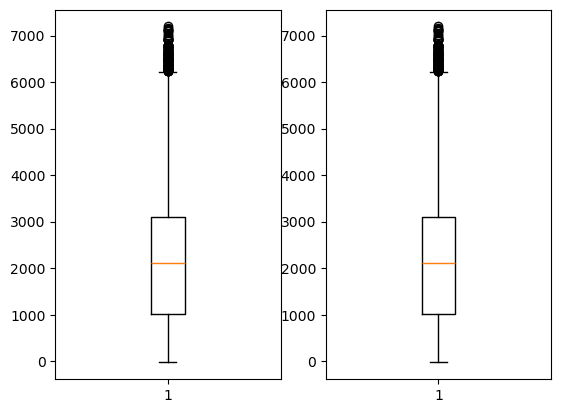

In [42]:
l=[]
for i in (visa_df['no_of_employees'].values):
    if i <LB or i>UB:
        l.append(median)
    else:
        l.append(i)
        
visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees'] = l
plt.subplot(1,2,1).boxplot(visa_df_copy['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'])
plt.show()

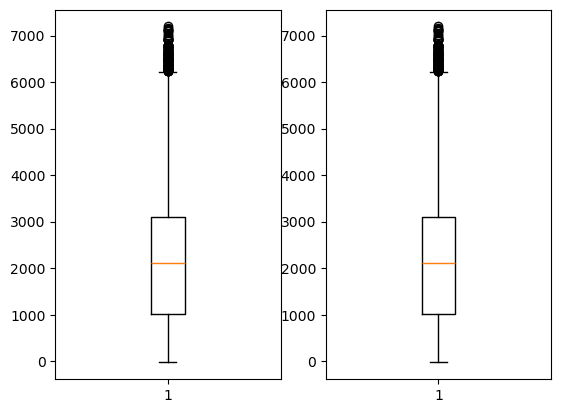

In [43]:
cond1 = visa_df['no_of_employees']<LB
cond2 = visa_df['no_of_employees']>UB
con = cond1 | cond2
median=visa_df['no_of_employees'].median()
l = np.where(con, median, visa_df['no_of_employees'])
visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees'] = l
plt.subplot(1,2,1).boxplot(visa_df_copy['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'])
plt.show()